In [78]:
# necessary libraries, functions, and constants
import csv
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from PIL import Image
from sklearn import discriminant_analysis
from sklearn import metrics
from sklearn import model_selection
from sklearn import neighbors

labels = ['ocean', 'ship', 'sky']

# this function taken from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() * 0.75
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
# import data from data.csv
y = []
X = []

with open('data.csv', 'r') as csvfile:
    data_reader = csv.reader(csvfile, dialect='excel')
    for row in data_reader:
        if len(row) > 0:
            y.append(row[0])
            X_float = [ float(x) for x in row[1:] ]
            X.append(X_float)

print("%s observations" % (len(y)))
assert len(X) == len(y)

print("Label counts:")
for label in labels:
    print("%s - %s" % (label, y.count(label)))


3347 observations
Label counts:
ocean - 504
ship - 2347
sky - 496


# K-Nearest Neighbors
Inputs: number of neighbors, training and test sets

Outputs: accuracy score, confusion matrix

In [79]:
# record metrics for the cross-validated value - n-neighbors
# format of knn_metrics is [index, neighbors, score, confusion matrix]
# score is the mean accuracy and is provided by the score function of the classifier
knn_metrics = pd.DataFrame(columns=('neighbors', 'score', 'confusion matrix'))

# create training and test sets
# first method - evenly split training and test set into two random sets
# randomly select from the original data into even-sized training and test sets
# using training/test set cross-validation, with equally sized training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

def knn(k, X_train, y_train, X_test, y_test):
    """
    Performs K-nearest Neighbors with provided parameters, returns a tuple containing
    k, accuracy, precision, confusion matrix
    """
    classifier = neighbors.KNeighborsClassifier(k, 'distance')
    classifier.fit(X_train, y_train)
    
    y_prediction = classifier.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_prediction, labels=labels)
    score = classifier.score(X_test, y_test)
    
    metric = (k, score, cm)
    return metric

max_k = int(math.sqrt(len(X_train)))
print("max k = " + str(max_k))

i = 0
for k in range(1, max_k + 1):
    metric = knn(k, X_train, y_train, X_test, y_test)
    if k == 1 or k % 5 == 0:
        print("k = %s, metric = %s" % (k, metric))
    knn_metrics.loc[i] = metric
    i += 1


max k = 40
k = 1, metric = (1, 0.75507765830346474, array([[143,  64,  44],
       [113, 993,  57],
       [ 90,  42, 128]]))
k = 5, metric = (5, 0.77060931899641572, array([[ 138,   81,   32],
       [ 107, 1029,   27],
       [  83,   54,  123]]))
k = 10, metric = (10, 0.77598566308243733, array([[ 134,   88,   29],
       [ 100, 1042,   21],
       [  73,   64,  123]]))
k = 15, metric = (15, 0.77419354838709675, array([[ 132,   86,   33],
       [ 105, 1044,   14],
       [  66,   74,  120]]))
k = 20, metric = (20, 0.77897252090800473, array([[ 127,   94,   30],
       [  92, 1059,   12],
       [  61,   81,  118]]))
k = 25, metric = (25, 0.78255675029868577, array([[ 128,   97,   26],
       [  77, 1074,   12],
       [  60,   92,  108]]))
k = 30, metric = (30, 0.77718040621266427, array([[ 114,  111,   26],
       [  73, 1082,    8],
       [  60,   95,  105]]))
k = 35, metric = (35, 0.7700119474313023, array([[ 108,  114,   29],
       [  67, 1087,    9],
       [  60,  106,   94

In [80]:
print(knn_metrics)
print(knn_metrics['score'])

max_accuracy = knn_metrics.loc[knn_metrics['score'].idxmax()]
print("best mean accuracy = %s @ k = %s" % (max_accuracy['score'], max_accuracy['neighbors']))


    neighbors     score                                 confusion matrix
0         1.0  0.755078   [[143, 64, 44], [113, 993, 57], [90, 42, 128]]
1         2.0  0.755078   [[143, 64, 44], [113, 993, 57], [90, 42, 128]]
2         3.0  0.768817  [[146, 71, 34], [110, 1010, 43], [81, 48, 131]]
3         4.0  0.760454  [[140, 75, 36], [117, 1007, 39], [86, 48, 126]]
4         5.0  0.770609  [[138, 81, 32], [107, 1029, 27], [83, 54, 123]]
5         6.0  0.769415  [[141, 75, 35], [115, 1020, 28], [78, 55, 127]]
6         7.0  0.770609  [[135, 79, 37], [110, 1030, 23], [80, 55, 125]]
7         8.0  0.772401  [[132, 82, 37], [107, 1035, 21], [77, 57, 126]]
8         9.0  0.771804  [[136, 81, 34], [111, 1030, 22], [71, 63, 126]]
9        10.0  0.775986  [[134, 88, 29], [100, 1042, 21], [73, 64, 123]]
10       11.0  0.775388  [[132, 88, 31], [100, 1045, 18], [70, 69, 121]]
11       12.0  0.775986  [[135, 87, 29], [104, 1041, 18], [69, 68, 123]]
12       13.0  0.774194  [[129, 89, 33], [102, 1047

Normalized confusion matrix
[[ 0.50199203  0.40239044  0.09561753]
 [ 0.06534824  0.92519347  0.0094583 ]
 [ 0.23846154  0.34230769  0.41923077]]


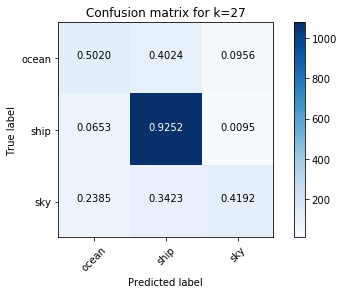

In [81]:
plot_confusion_matrix(max_accuracy['confusion matrix'], 
                      labels, 
                      title='Confusion matrix for k=%s' % (int(max_accuracy['neighbors'])))
plt.show()

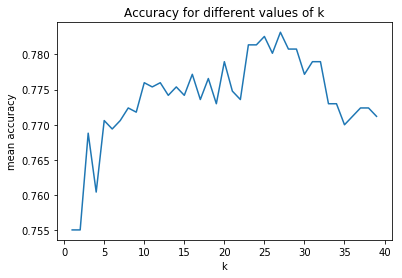

In [84]:
plt.plot(range(1, max_k), knn_metrics['score'], label='accuracy')
plt.title("Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("mean accuracy")
plt.show()

# LDA and QDA
Variables: N/A

Output: accuracy score, confusion matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA Results:
accuracy = 0.554360812425
confusion matrix = 
[[106  86  59]
 [253 732 178]
 [ 78  92  90]]
Normalized confusion matrix
[[ 0.42231076  0.34262948  0.23505976]
 [ 0.21754084  0.62940671  0.15305245]
 [ 0.3         0.35384615  0.34615385]]


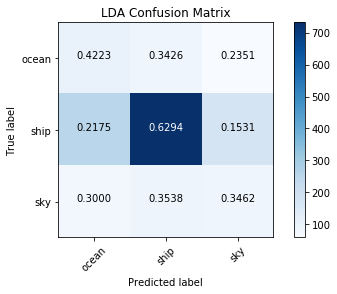

In [76]:
# response has to be numeric for LDA and QDA
y_train_numeric = []
y_test_numeric = []
for label in y_train:
    y_train_numeric.append(labels.index(label))

for label in y_test_numeric:
    y_test_numeric.append(labels.index(label))

# LDA
    
#print(y_train_numeric[:5])
#print(X_train[:5])
classifier = discriminant_analysis.LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train_numeric)

y_prediction = []
y_prediction_num = classifier.predict(X_test)
for pred in y_prediction_num:
    y_prediction.append(labels[pred])

cm = metrics.confusion_matrix(y_test, y_prediction, labels=labels)
accuracy = metrics.accuracy_score(y_test, y_prediction, normalize=True)

print("LDA Results:")
print("accuracy = " + str(accuracy))
print("confusion matrix = ")
print(cm)

plot_confusion_matrix(cm, labels, title="LDA Confusion Matrix")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Results:
accuracy = 0.58064516129
confusion matrix = 
[[ 48 172  31]
 [168 885 110]
 [ 54 167  39]]
Normalized confusion matrix
[[ 0.19123506  0.68525896  0.12350598]
 [ 0.144454    0.76096303  0.09458298]
 [ 0.20769231  0.64230769  0.15      ]]


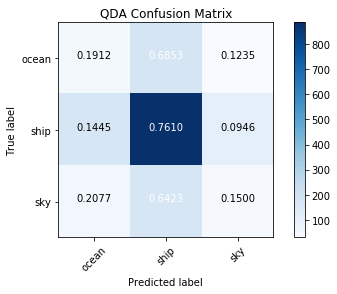

In [77]:
# QDA
classifier = discriminant_analysis.QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train_numeric)

y_prediction = []
y_prediction_num = classifier.predict(X_test)
for pred in y_prediction_num:
    y_prediction.append(labels[pred])

cm = metrics.confusion_matrix(y_test, y_prediction, labels=labels)
accuracy = metrics.accuracy_score(y_test, y_prediction, normalize=True)

print("QDA Results:")
print("accuracy = " + str(accuracy))
print("confusion matrix = ")
print(cm)

plot_confusion_matrix(cm, labels, title="QDA Confusion Matrix")
plt.show()

# Convolutional Neural Network
Inputs:

Outputs:
